In [22]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

import wave
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from tqdm import tqdm_notebook as tqdm
import tsfresh
from entropy import *
import entropy
from scipy.signal import periodogram, welch
import matplotlib
matplotlib.use('PDF')
plt.style.use('ggplot') 
%matplotlib inline

In [23]:
path = '/Volumes/TOSHIBA EXT/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'

In [24]:
#https://homepage.univie.ac.at/christian.herbst/python/dsp_util_8py_source.html
#https://core.ac.uk/download/pdf/82343096.pdf
def calculateJitterRatio(data):
    n = len(data)
    sum1 = 0
    sum2 = 0
    for i in range(n):
        if i > 0:
            sum1 += abs(data[i-1] - data[i])
        sum2 += data[i]
    sum1 /= float(n - 1)
    sum2 /= float(n)
    return 1000.0 * sum1 / sum2

def calculateJitterFactor(data):
    n = len(data)
    dataF = np.zeros(n)
    for i in range(n):
    # convert from periods to F0 per cycle
        dataF[i] = 1.0 / data[i]
    sum1 = 0
    sum2 = 0
    for i in range(n):
        if i > 0:
            sum1 += abs(dataF[i] - dataF[i-1])
        sum2 += dataF[i]
    sum1 /= float(n - 1)
    sum2 /= float(n)
    return 100.0 * sum1 / sum2

def calculateJitterPercent(data):
    return calculateJitterRatio(data) / 10.0

In [25]:
#https://raphaelvallat.com/entropy/build/html/generated/entropy.spectral_entropy.html

def spectral_entropy(x, sf=22050, method='fft', nperseg=None, normalize=False):
    """Spectral Entropy.

    Parameters
    ----------
    x : list or np.array
        One-dimensional time series of shape (n_times)
    sf : float
        Sampling frequency
    method : str
        Spectral estimation method ::

        'fft' : Fourier Transform (via scipy.signal.periodogram)
        'welch' : Welch periodogram (via scipy.signal.welch)

    nperseg : str or int
        Length of each FFT segment for Welch method.
        If None, uses scipy default of 256 samples.
    normalize : bool
        If True, divide by log2(psd.size) to normalize the spectral entropy
        between 0 and 1. Otherwise, return the spectral entropy in bit.

    Returns
    -------
    se : float
        Spectral Entropy

    Notes
    -----
    Spectral Entropy is defined to be the Shannon Entropy of the Power
    Spectral Density (PSD) of the data:

    .. math:: H(x, sf) =  -\\sum_{f=0}^{f_s/2} PSD(f) log_2[PSD(f)]

    Where :math:`PSD` is the normalised PSD, and :math:`f_s` is the sampling
    frequency.

    References
    ----------
    .. [1] Inouye, T. et al. (1991). Quantification of EEG irregularity by
       use of the entropy of the power spectrum. Electroencephalography
       and clinical neurophysiology, 79(3), 204-210.

    Examples
    --------
    1. Spectral entropy of a pure sine using FFT

        >>> from entropy import spectral_entropy
        >>> import numpy as np
        >>> sf, f, dur = 100, 1, 4
        >>> N = sf * duration # Total number of discrete samples
        >>> t = np.arange(N) / sf # Time vector
        >>> x = np.sin(2 * np.pi * f * t)
        >>> print(np.round(spectral_entropy(x, sf, method='fft'), 2)
            0.0

    2. Spectral entropy of a random signal using Welch's method

        >>> from entropy import spectral_entropy
        >>> import numpy as np
        >>> np.random.seed(42)
        >>> x = np.random.rand(3000)
        >>> print(spectral_entropy(x, sf=100, method='welch'))
            9.939

    3. Normalized spectral entropy

        >>> print(spectral_entropy(x, sf=100, method='welch', normalize=True))
            0.995
    """
    x = np.array(x)
    # Compute and normalize power spectrum
    if method == 'fft':
        _, psd = periodogram(x, sf)
    elif method == 'welch':
        _, psd = welch(x, sf, nperseg=nperseg)
    psd_norm = np.divide(psd, psd.sum())
    se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
    if normalize:
        se /= np.log2(psd_norm.size)
    return se

In [26]:
# a. Trachea (Tc)
# b. Anterior left (Al)
# c. Anterior right (Ar)
# d. Posterior left (Pl)
# e. Posterior right (Pr)
# f. Lateral left (Ll)
# g. Lateral right (Lr)

In [27]:
def patient():
    #all audio is mixed to mono and resampled to 22050 Hz at load time
    array = []
    h_102_Ar, rate = librosa.load(path+'103_2b2_Ar_mc_LittC2SE.wav')#102
    array.extend(h_102_Ar)
    h_121_Tc , rate= librosa.load(path+'104_1b1_Al_sc_Litt3200.wav')#121
    array.extend(h_121_Tc)
    h_123_Al, rate = librosa.load(path+'105_1b1_Tc_sc_Meditron.wav')#123
    array.extend(h_123_Al)
    h_125_Tc, rate = librosa.load(path+'106_2b1_Pl_mc_LittC2SE.wav')#125
    array.extend(h_125_Tc)
    h_126_Al, rate = librosa.load(path+'107_2b3_Al_mc_AKGC417L.wav')#126
    array.extend(h_126_Al)
    h_127_Ar, rate = librosa.load(path+'107_2b3_Ar_mc_AKGC417L.wav')#127
    array.extend(h_127_Ar)
    h_136_Ar, rate = librosa.load(path+'108_1b1_Al_sc_Meditron.wav')#136
    array.extend(h_136_Ar)
    h_143_Al, rate = librosa.load(path+'109_1b1_Al_sc_Litt3200.wav')#143
    array.extend(h_143_Al)
    h_144_Al, rate = librosa.load(path+'109_1b1_Ar_sc_Litt3200.wav')#144
    array.extend(h_144_Al)
    h_144_Tc, rate = librosa.load(path+'110_1b1_Pr_sc_Meditron.wav')#144
    array.extend(h_144_Tc)
    h_152_Al, rate = librosa.load(path+'110_1p1_Al_sc_Meditron.wav')#152
    array.extend(h_152_Al)
    h_153_Al, rate = librosa.load(path+'110_1p1_Ll_sc_Meditron.wav')#153
    array.extend(h_153_Al)
    h_159_Al, rate = librosa.load(path+'111_1b2_Tc_sc_Meditron.wav')#159
    array.extend(h_159_Al )
    h_159_Ar, rate = librosa.load(path+'111_1b3_Tc_sc_Meditron.wav')#159
    array.extend(h_159_Ar)
    h_159_Ll, rate = librosa.load(path+'112_1b1_Ar_sc_Meditron.wav')#159
    array.extend(h_159_Ll)
    h_159_Pr, rate = librosa.load(path+'113_1b1_Ar_sc_Litt3200.wav')#159
    array.extend(h_159_Pr)
    h_171_Al, rate = librosa.load(path+'113_1b1_Ll_sc_Litt3200.wav')#171
    array.extend(h_171_Al)
    h_179_Al, rate = librosa.load(path+'113_1b1_Lr_sc_Litt3200.wav')#179
    array.extend(h_179_Al)
    h_179_Tc, rate = librosa.load(path+'114_1b4_Al_mc_AKGC417L.wav')#179
    array.extend(h_179_Tc)
    h_182_Tc, rate = librosa.load(path+'115_1b1_Ar_sc_Meditron.wav')#182
    array.extend(h_182_Tc)
    h_183_Pl, rate = librosa.load(path+'116_1b2_Pl_sc_Meditron.wav')#183
    array.extend(h_183_Pl)
    h_183_Tc, rate = librosa.load(path+'117_1b2_Tc_mc_LittC2SE.wav')#183
    array.extend(h_183_Tc)
    h_184_Ar, rate = librosa.load(path+'117_1b3_Tc_mc_LittC2SE.wav')#184
    array.extend(h_184_Ar)
    h_187_Ll, rate = librosa.load(path+'118_1b1_Al_sc_Litt3200.wav')#187
    array.extend(h_187_Ll)
    h_194_Lr, rate = librosa.load(path+'118_1b1_Ar_sc_Litt3200.wav')#194
    array.extend(h_194_Lr)
    h_194_Pr, rate = librosa.load(path+'119_1b1_Ar_sc_Meditron.wav')#194
    array.extend(h_194_Pr)
    h_202_Ar, rate = librosa.load(path+'120_1b1_Al_sc_Meditron.wav')#202
    array.extend(h_202_Ar)
    h_208_Ll, rate = librosa.load(path+'120_1b1_Ar_sc_Meditron.wav')#208
    array.extend(h_208_Ll )
    h_209_Tc, rate = librosa.load(path+'122_2b1_Al_mc_LittC2SE.wav')#209
    array.extend(h_209_Tc )
    h_214_Ar, rate = librosa.load(path+'122_2b1_Ar_mc_LittC2SE.wav')#214
    array.extend(h_214_Ar )
    h_217_Tc, rate = librosa.load(path+'122_2b1_Tc_mc_LittC2SE.wav')#217
    array.extend(h_217_Tc)
    h_224_Tc, rate = librosa.load(path+'124_1b1_Al_sc_Litt3200.wav')#224
    array.extend(h_224_Tc)
    h_224_Al, rate = librosa.load(path+'224_1b2_Al_sc_Meditron.wav')#224
    array.extend(h_224_Al)
    h_225_Pl, rate = librosa.load(path+'124_1b1_Ar_sc_Litt3200.wav')#225
    array.extend(h_225_Pl)
    h_124_Pl, rate = librosa.load(path+'124_1b1_Ll_sc_Litt3200.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'128_1b3_Tc_mc_LittC2SE.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'129_1b1_Ar_sc_Meditron.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'130_1p2_Al_mc_AKGC417L.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'130_1p2_Ar_mc_AKGC417L.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'130_1p2_Ll_mc_AKGC417L.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'130_1p2_Lr_mc_AKGC417L.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'131_1b1_Al_sc_Meditron.wav')#225
    array.extend(h_124_Pl)
    h_124_Pl, rate = librosa.load(path+'132_2b1_Lr_mc_LittC2SE.wav')#225
    array.extend(h_124_Pl)
    return array

In [30]:
def healthy():
    #all audio is mixed to mono and resampled to 22050 Hz at load time
    array = []
    h_102_Ar, rate = librosa.load(path+'102_1b1_Ar_sc_Meditron.wav')#102
    array.extend(h_102_Ar)
    h_121_Tc , rate= librosa.load(path+'121_1b1_Tc_sc_Meditron.wav')#121
    array.extend(h_121_Tc)
    h_123_Al, rate = librosa.load(path+'123_1b1_Al_sc_Meditron.wav')#123
    array.extend(h_123_Al)
    h_125_Tc, rate = librosa.load(path+'125_1b1_Tc_sc_Meditron.wav')#125
    array.extend(h_125_Tc)
    h_126_Al, rate = librosa.load(path+'126_1b1_Al_sc_Meditron.wav')#126
    array.extend(h_126_Al)
    h_127_Ar, rate = librosa.load(path+'127_1b1_Ar_sc_Meditron.wav')#127
    array.extend(h_127_Ar)
    h_136_Ar, rate = librosa.load(path+'136_1b1_Ar_sc_Meditron.wav')#136
    array.extend(h_136_Ar)
    h_143_Al, rate = librosa.load(path+'143_1b1_Al_sc_Meditron.wav')#143
    array.extend(h_143_Al)
    h_144_Al, rate = librosa.load(path+'144_1b1_Al_sc_Meditron.wav')#144
    array.extend(h_144_Al)
    h_144_Tc, rate = librosa.load(path+'144_1b1_Tc_sc_Meditron.wav')#144
    array.extend(h_144_Tc)
    h_152_Al, rate = librosa.load(path+'152_1b1_Al_sc_Meditron.wav')#152
    array.extend(h_152_Al)
    h_153_Al, rate = librosa.load(path+'153_1b1_Al_sc_Meditron.wav')#153
    array.extend(h_153_Al)
    h_159_Al, rate = librosa.load(path+'159_1b1_Al_sc_Meditron.wav')#159
    array.extend(h_159_Al )
    h_159_Ar, rate = librosa.load(path+'159_1b1_Ar_sc_Meditron.wav')#159
    array.extend(h_159_Ar)
    h_159_Ll, rate = librosa.load(path+'159_1b1_Ll_sc_Meditron.wav')#159
    array.extend(h_159_Ll)
    h_159_Pr, rate = librosa.load(path+'159_1b1_Pr_sc_Meditron.wav')#159
    array.extend(h_159_Pr)
    h_171_Al, rate = librosa.load(path+'171_1b1_Al_sc_Meditron.wav')#171
    array.extend(h_171_Al)
    h_179_Al, rate = librosa.load(path+'179_1b1_Al_sc_Meditron.wav')#179
    array.extend(h_179_Al)
    h_179_Tc, rate = librosa.load(path+'179_1b1_Tc_sc_Meditron.wav')#179
    array.extend(h_179_Tc)
    h_182_Tc, rate = librosa.load(path+'182_1b1_Tc_sc_Meditron.wav')#182
    array.extend(h_182_Tc)
    h_183_Pl, rate = librosa.load(path+'183_1b1_Pl_sc_Meditron.wav')#183
    array.extend(h_183_Pl)
    h_183_Tc, rate = librosa.load(path+'183_1b1_Tc_sc_Meditron.wav')#183
    array.extend(h_183_Tc)
    h_184_Ar, rate = librosa.load(path+'184_1b1_Ar_sc_Meditron.wav')#184
    array.extend(h_184_Ar)
    h_187_Ll, rate = librosa.load(path+'187_1b1_Ll_sc_Meditron.wav')#187
    array.extend(h_187_Ll)
    h_194_Lr, rate = librosa.load(path+'194_1b1_Lr_sc_Meditron.wav')#194
    array.extend(h_194_Lr)
    h_194_Pr, rate = librosa.load(path+'194_1b1_Pr_sc_Meditron.wav')#194
    array.extend(h_194_Pr)
    h_202_Ar, rate = librosa.load(path+'202_1b1_Ar_sc_Meditron.wav')#202
    array.extend(h_202_Ar)
    h_208_Ll, rate = librosa.load(path+'208_1b1_Ll_sc_Meditron.wav')#208
    array.extend(h_208_Ll )
    h_209_Tc, rate = librosa.load(path+'209_1b1_Tc_sc_Meditron.wav')#209
    array.extend(h_209_Tc )
    h_214_Ar, rate = librosa.load(path+'214_1b1_Ar_sc_Meditron.wav')#214
    array.extend(h_214_Ar )
    h_217_Tc, rate = librosa.load(path+'217_1b1_Tc_sc_Meditron.wav')#217
    array.extend(h_217_Tc)
    h_224_Tc, rate = librosa.load(path+'224_1b1_Tc_sc_Meditron.wav')#224
    array.extend(h_224_Tc)
    h_224_Al, rate = librosa.load(path+'224_1b2_Al_sc_Meditron.wav')#224
    array.extend(h_224_Al)
    h_225_Pl, rate = librosa.load(path+'225_1b1_Pl_sc_Meditron.wav')#225
    array.extend(h_225_Pl)
    return array

def rolling_window(a, window):
    return list(pd.Series(a).rolling(window).mean())
#     new = []
#     value = 0
#     for i in range(len(a)):
#         while i%window != 0 or i == 0:
#             value += a[i]
#         if i%window == 0 and i != 0:
#             new.append(value/window)
#             value = 0
#     return new

def split(arr, size):
    #arr = arr.values
    arrs = []
    while len(arr) > size:
        pice = arr[:size]
        arrs.append(pice)
        arr   = arr[(size//2):]
    arrs.append(arr)
    return arrs

def feature_extraction(data, healthy):
    array_feature = []
    i = 0
    for each_array in data:
        each_array = np.asarray(each_array)
        f = np.zeros(25)
        #https://librosa.github.io/librosa/generated/librosa.feature.zero_crossing_rate.html
        f[0] = np.sum(librosa.feature.zero_crossing_rate(each_array))
        #MFCC — Mel-Frequency Cepstral Coefficients
        #https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd
        '''
        This feature is one of the most important method to extract a feature 
        of an audio signal and is used majorly whenever working on audio signals. 
        The mel frequency cepstral coefficients (MFCCs) of a signal are a small 
        set of features (usually about 10–20) which concisely describe the 
        overall shape of a spectral envelope.
        '''
        f[1] = np.sum(librosa.feature.mfcc(each_array))/librosa.feature.mfcc(each_array).shape[1]
        #Spectral Centroid
        '''
        It indicates where the ”centre of mass” for a sound is 
        located and is calculated as the weighted mean of the frequencies present 
        in the sound. If the frequencies in music are same throughout then spectral 
        centroid would be around a centre and if there are high frequencies at the 
        end of sound then the centroid would be towards its end.
        
        The mean value of the spectral centroid across all the frames can be 
        used as the SC feature for each epoch of the frame of the EEG Signal.
        '''
        f[2] = np.sum(librosa.feature.spectral_centroid(each_array))/librosa.feature.spectral_centroid(each_array).shape[1]
        
        #Spectral Rolloff
        '''
        Spectral rolloff is the frequency below which a specified percentage 
        of the total spectral energy, e.g. 85%, lies.
        '''
        f[3] = np.sum(librosa.feature.spectral_rolloff(each_array)/librosa.feature.spectral_rolloff(each_array).shape[1])
        
        ######
        f[4] = tsfresh.feature_extraction.feature_calculators.abs_energy(each_array)
        ######
        
        '''
        Calculates the fourier coefficients of the one-dimensional 
        discrete Fourier Transform for real input by fast fourier transformation algorithm
        '''
        
        koef = dict(tsfresh.feature_extraction.feature_calculators.fft_coefficient(each_array,
                                                               [{"coeff": 1, "attr": 'real'}]))
#                                                                               {"coeff": 2, "attr": 'real'},
#                                                                               {"coeff": 3, "attr": 'real'},
#                                                                               {"coeff": 4, "attr": 'real'}]))
        f[5] =koef['coeff_1__attr_"real"']
        
        ######
        
        '''Returns the spectral centroid (mean), variance, skew, and kurtosis of 
        the absolute fourier transform spectrum.'''
        koef2 = dict(tsfresh.feature_extraction.feature_calculators.fft_aggregated(each_array,
                                                               [{"aggtype": 'centroid'},
                                                                              {"aggtype": 'variance'},
                                                                              {"aggtype": 'skew'},
                                                                              {"aggtype": 'kurtosis'}]))
        #print(koef2)
        f[6] =koef2['aggtype_"centroid"']
        f[7] =koef2['aggtype_"variance"']
        f[8] =koef2['aggtype_"skew"']
        f[9] =koef2['aggtype_"kurtosis"']
        ######
        #spectral entropy
        f[10] = spectral_entropy(each_array)
        ######
        #First bins the values of x into max_bins equidistant bins
        f[11] = tsfresh.feature_extraction.feature_calculators.binned_entropy(each_array, 
                                                              max_bins=50000)
        
        ######
        
        f[12] = tsfresh.feature_extraction.feature_calculators.first_location_of_maximum(each_array) 
        f[13] = tsfresh.feature_extraction.feature_calculators.first_location_of_minimum(each_array) 
        f[14] = tsfresh.feature_extraction.feature_calculators.kurtosis(each_array)
        f[15] = tsfresh.feature_extraction.feature_calculators.last_location_of_maximum(each_array)
        f[16] = tsfresh.feature_extraction.feature_calculators.last_location_of_minimum(each_array)
        f[17] = tsfresh.feature_extraction.feature_calculators.longest_strike_above_mean(each_array)
        f[18] =tsfresh.feature_extraction.feature_calculators.longest_strike_below_mean(each_array)
        f[19] =tsfresh.feature_extraction.feature_calculators.maximum(each_array)
        f[20] =tsfresh.feature_extraction.feature_calculators.mean(each_array)
        f[21] =tsfresh.feature_extraction.feature_calculators.mean_abs_change(each_array)
        f[22] =tsfresh.feature_extraction.feature_calculators.mean_second_derivative_central(each_array)
        f[23] =tsfresh.feature_extraction.feature_calculators.median(each_array)
        
        if healthy == True:
            f[24] = 0
        else:
            f[24] = 1
        if i == 0:
            print('quantity of feature_vector:', len(f))
            print(f)
            i+=1
        
        array_feature.append(f)
        
                 
    return array_feature
        
        
         
        

In [31]:
array_healthy = healthy()

In [32]:
array_sick =patient()

In [33]:
array_healthy_filt = rolling_window(array_healthy, 500)[500:]

In [34]:
array_sick_filt = rolling_window(array_sick, 1000)[1000:]

___________

# part with graphs

_____

In [8]:
import librosa.display

In [65]:
sick, rate = librosa.load(path+'103_2b2_Ar_mc_LittC2SE.wav')
healthy, rate = librosa.load(path+'102_1b1_Ar_sc_Meditron.wav')#102

In [61]:
import seaborn as sns

In [73]:
from scipy.fftpack import fft, ifft

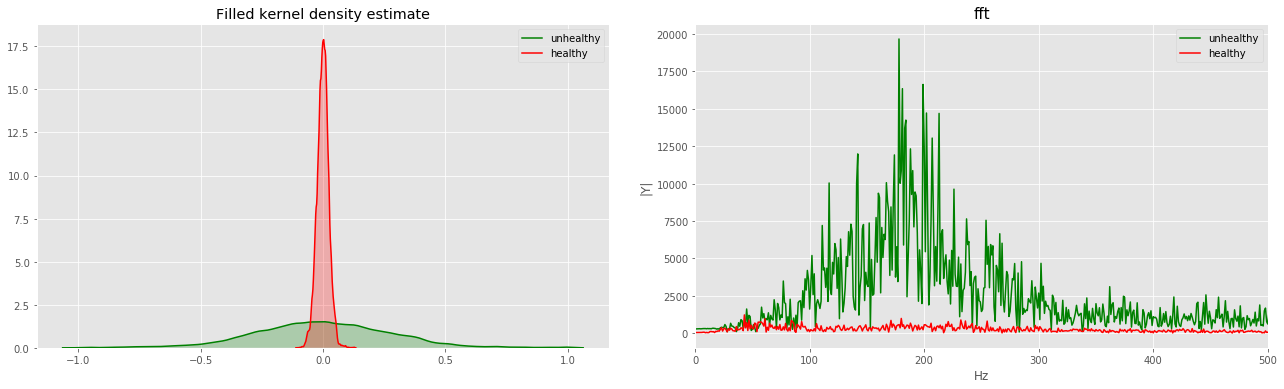

In [78]:
plt.subplot(221)
# Plot a filled kernel density estimate
sns.distplot(sick, hist=False, color="g", kde_kws={"shade": True}, label = 'unhealthy')
sns.distplot(healthy, hist=False, color="r", kde_kws={"shade": True}, label = 'healthy')
plt.title('Filled kernel density estimate')

plt.subplot(222)
plt.plot(abs(fft(sick))[:len(sick) // 2],c = 'g', label='unhealthy')
plt.plot(abs(fft(healthy))[:len(healthy) // 2], c = 'r', label='healthy')
plt.xlim(0, 500)
plt.ylabel('|Y|')
plt.xlabel('Hz')
plt.legend()
plt.title('fft', fontsize=15)

plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

plt.savefig('distr'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()

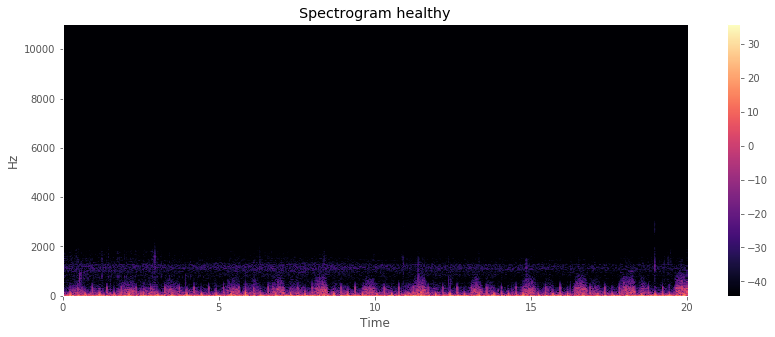

In [16]:

#display Spectrogram
X = librosa.stft(np.asarray(healthy))
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=22050, x_axis='time', y_axis='hz') 
plt.title('Spectrogram healthy')
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.savefig('img_librosa_healthy'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.colorbar()

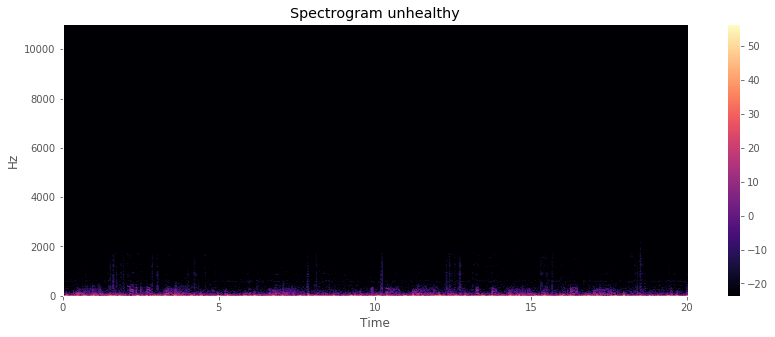

In [15]:
X = librosa.stft(np.asarray(sick))
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=22050, x_axis='time', y_axis='hz') 
plt.title('Spectrogram unhealthy')
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.savefig('img_librosa_sick'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.colorbar()

(20, 862)


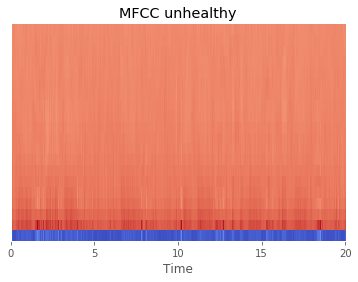

In [19]:
mfccs = librosa.feature.mfcc(np.asarray(sick), sr=22050)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.title('MFCC unhealthy')
librosa.display.specshow(mfccs, sr=22050, x_axis='time')
plt.savefig('img_MFCC unhealthy'+ '.jpg', format = 'jpg', bbox_inches = 'tight')

(20, 862)


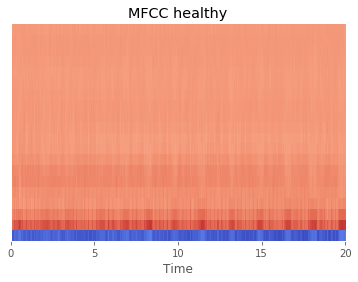

In [20]:
mfccs = librosa.feature.mfcc(np.asarray(healthy), sr=22050)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.title('MFCC healthy')
librosa.display.specshow(mfccs, sr=22050, x_axis='time')
plt.savefig('img_MFCC healthy'+ '.jpg', format = 'jpg', bbox_inches = 'tight')

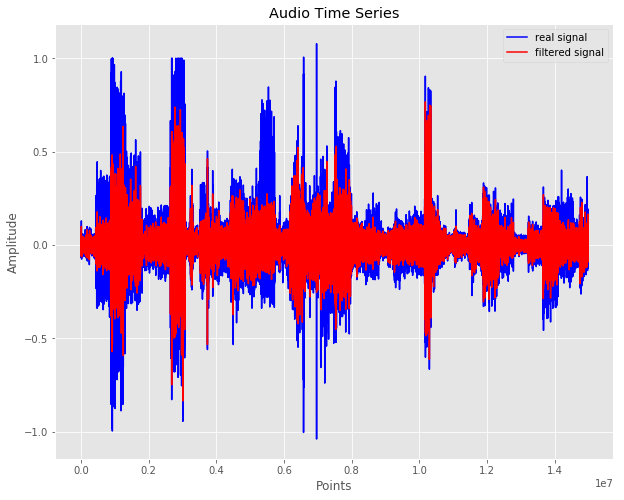

In [223]:
#Audio will be automatically resampled to the given rate (default sr=22050).
plt.figure(figsize=(10, 8))
plt.plot(array_healthy, label = 'real signal', c = 'b')
plt.plot(array_healthy_filt, label = 'filtered signal', c = 'r')
plt.xlabel('Points')
plt.ylabel('Amplitude')
plt.title('Audio Time Series')
plt.grid(True)
plt.legend()
plt.savefig('img'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()


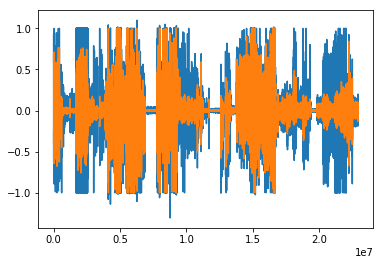

In [18]:
plt.plot(array_sick)
plt.plot(array_sick_filt)

In [19]:
len(array_healthy_filt)

14983358

In [20]:
len(array_sick_filt)

22944681

In [ ]:
from scipy.fftpack import fft, ifft

In [ ]:
y = abs(fft(array_sick_filt))[:len(array_sick_filt) // 2]

In [ ]:
z = abs(fft(array_healthy_filt))[:len(array_healthy_filt) // 2]

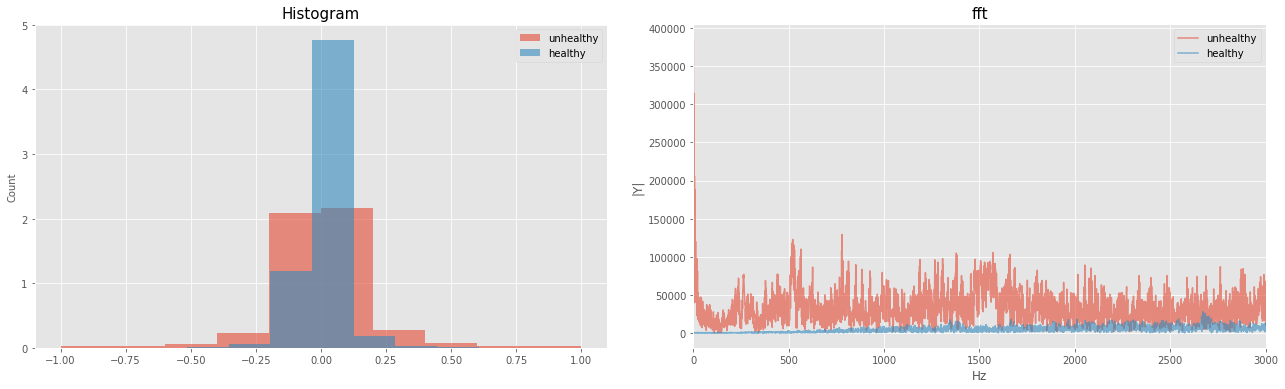

In [333]:
plt.subplot(221)
plt.hist(array_sick_filt, alpha=0.6, label='unhealthy', normed=True)
plt.hist(array_healthy_filt, alpha=0.6, label='healthy', normed=True)
plt.legend()
#plt.xlabel('Num of pregnancies', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Histogram', fontsize=15)
plt.grid(True)

plt.subplot(222)
plt.plot(y, alpha=0.6, label='unhealthy')
plt.plot(z, alpha=0.6, label='healthy')
plt.xlim(0, 3000)
plt.ylabel('|Y|')
plt.xlabel('Hz')
plt.legend()
plt.title('fft', fontsize=15)



plt.subplots_adjust(top=2.92, bottom=0.28, left=0.10, right=2.95, hspace=0.35,
                    wspace=0.15)

plt.savefig('img_hist'+ '.jpg', format = 'jpg', bbox_inches = 'tight')


_____

_______

_____

In [35]:
array_healthy_filt_split = split(array_healthy_filt, size = 10000)

In [36]:
array_sick_filt_split = split(array_sick_filt, size = 10000)

In [37]:
array_feature_healthy = feature_extraction(array_healthy_filt_split, True)

quantity of feature_vector: 25
[ 1.31835938e-02 -3.19390454e+02  1.55500107e+01  2.20715332e+01
  5.73195831e+00 -5.69187543e+01  1.68529724e+02  4.14022713e+05
  4.97694873e+00  2.90672150e+01  2.54994962e+00  9.01418733e+00
  6.43700000e-01  4.82000000e-02 -6.12190513e-01  6.43800000e-01
  4.83000000e-02  1.59300000e+03  1.66400000e+03  4.34932532e-02
 -6.18890121e-03  5.18812980e-05  7.63012628e-09 -1.31900852e-02
  0.00000000e+00]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log2
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in multiply


In [38]:
len(array_feature_healthy)

2996

In [39]:
array_feature_sick = feature_extraction(array_sick_filt_split, False)

quantity of feature_vector: 25
[ 1.75781250e-02 -1.67288623e+02  1.25004647e+01  1.88415527e+01
  5.15044512e+02  1.87773166e+02  5.84986120e+02  1.22920238e+06
  2.28470907e+00  7.64179031e+00  3.11612791e+00  8.94472346e+00
  2.65000000e-02  1.45700000e-01  1.64234675e+00  2.66000000e-02
  1.45800000e-01  1.31200000e+03  2.16600000e+03  7.07553663e-01
  1.20073324e-02  3.84708506e-04 -3.71448584e-08 -1.18991508e-02
  1.00000000e+00]


In [40]:
len(array_feature_sick)

4588

In [41]:
len(array_feature_healthy)

2996

In [42]:
len(array_feature_healthy[0])

25

In [43]:
np.asarray(array_feature_healthy).reshape(-1,25)

array([[ 1.31835938e-02, -3.19390454e+02,  1.55500107e+01, ...,
         7.63012628e-09, -1.31900852e-02,  0.00000000e+00],
       [ 1.51367188e-02, -3.19838574e+02,  1.63731292e+01, ...,
         1.01510177e-08,  9.93782158e-04,  0.00000000e+00],
       [ 1.26953125e-02, -2.97213770e+02,  1.49279001e+01, ...,
         1.96204832e-10, -4.58477116e-03,  0.00000000e+00],
       ...,
       [ 2.53906250e-02, -2.51812036e+02,  2.03281725e+01, ...,
         2.19235657e-08, -3.80076824e-03,  0.00000000e+00],
       [ 2.68554688e-02, -2.41195020e+02,  1.73077748e+01, ...,
        -5.09706916e-09, -2.14455364e-03,  0.00000000e+00],
       [ 2.05078125e-02, -2.35714212e+02,  2.32987437e+01, ...,
        -3.03291888e-08,  7.21757421e-03,  0.00000000e+00]])

In [44]:
df = pd.DataFrame(np.asarray(array_feature_healthy).reshape(-1,25))

In [45]:
df2 = pd.DataFrame(np.asarray(array_feature_sick).reshape(-1,25))#, ignore_index=True )

In [46]:
df = df.append(df2, ignore_index=True)

In [47]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.013184,-319.390454,15.550011,22.071533,5.731958,-56.918754,168.529724,4.140227e+05,4.976949,29.067215,...,0.6438,0.0483,1593.0,1664.0,0.043493,-0.006189,0.000052,7.630126e-09,-0.013190,0.0
1,0.015137,-319.838574,16.373129,21.533203,7.830858,-11.214931,187.127668,4.567704e+05,4.693640,26.031051,...,0.5821,0.9788,1505.0,1315.0,0.056716,0.000422,0.000064,1.015102e-08,0.000994,0.0
2,0.012695,-297.213770,14.927900,20.456543,13.024045,3.550279,400.031530,9.112404e+05,2.956964,11.392475,...,0.5827,0.6765,1874.0,2994.0,0.099438,-0.001164,0.000078,1.962048e-10,-0.004585,0.0
3,0.007324,-298.090527,13.418211,20.456543,12.875201,-45.245573,227.652017,5.522050e+05,4.176843,20.960367,...,0.0827,0.9072,3411.0,2958.0,0.099438,-0.002441,0.000065,-9.859504e-09,-0.010063,0.0
4,0.005371,-321.830225,12.743439,18.841553,7.004699,98.090950,476.322825,1.051354e+06,2.634390,9.446980,...,0.0160,0.4072,3481.0,3270.0,0.047907,0.005109,0.000041,-2.168442e-09,0.010721,0.0


In [48]:
# from sklearn.utils import shuffle
# data = shuffle(df)
df = df.dropna()

In [49]:
target = df[24]
features = df.drop([24], axis=1)

Automatically created module for IPython interactive environment


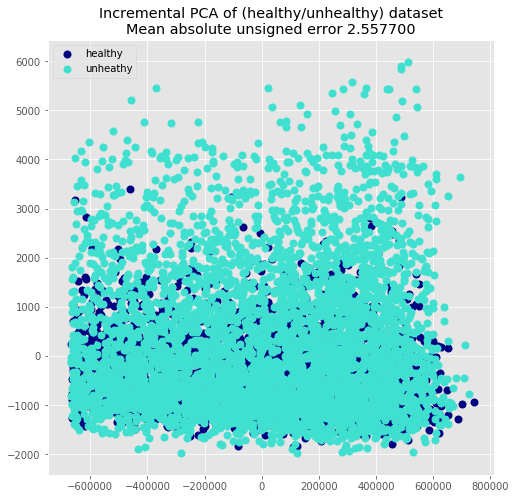

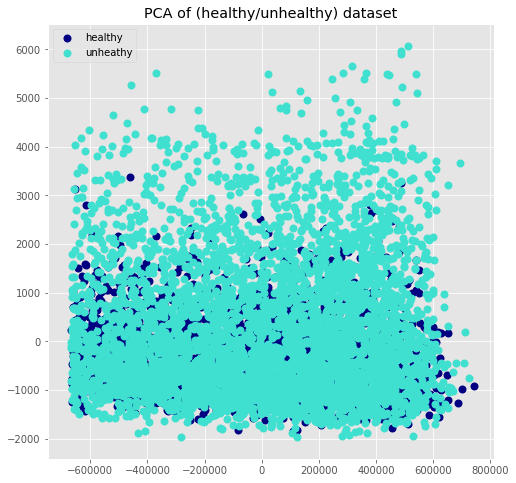

In [132]:
print(__doc__)

# Authors: Kyle Kastner
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

#iris = load_iris()
X = features
y = target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:

    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1], ['healthy', 'unheathy']):
        
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)
        
        plt.savefig('pca2'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
    

    if "Incremental" in title:
    
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of (healthy/unhealthy) dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        #plt.subplot(222)
        plt.title(title + " of (healthy/unhealthy) dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.savefig('pca3'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
    #plt.axis([-4, 4, -1.5, 1.5])

plt.savefig('pca'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()

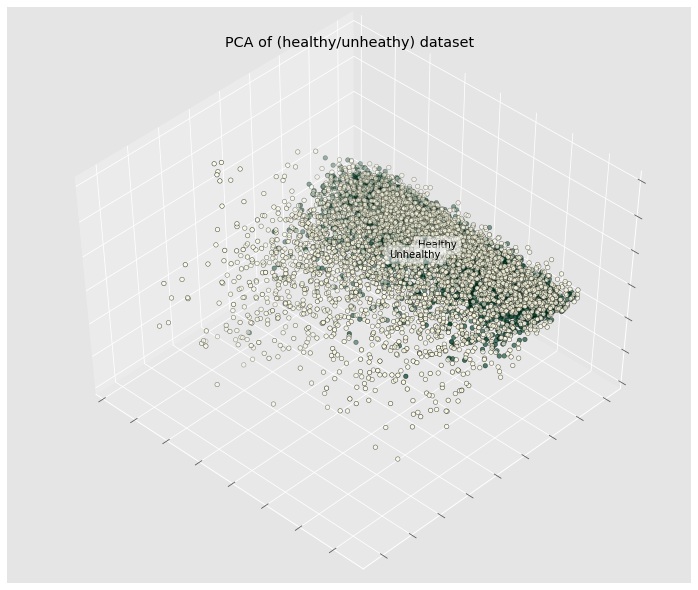

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
X = features
y = np.asarray(target).astype(int)

fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)



for name, label in [('Healthy', 0), ('Unhealthy', 1)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# # Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 0])
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=y, cmap="YlGn", edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_title('PCA of (healthy/unheathy) dataset')
plt.savefig('pca_3d'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()

In [337]:
corr = features.corr()

In [355]:
corr.to_excelcel('corr.xlsx')

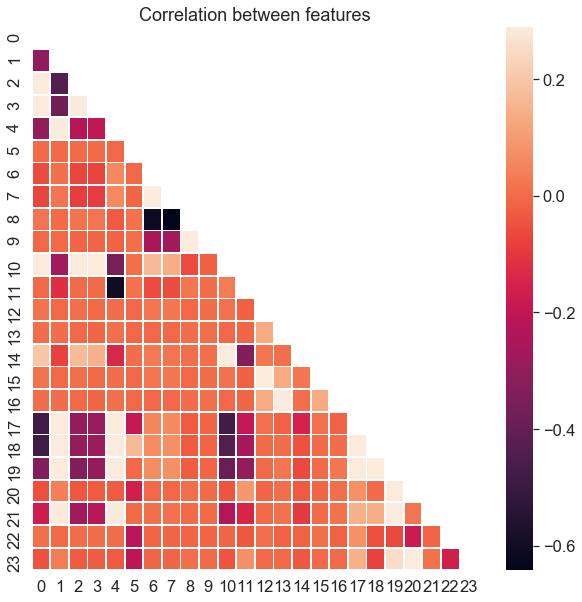

In [360]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.5)
with sns.axes_style("white"):
    ax = sns.heatmap(corr,mask=mask, vmax=0.29, linewidths=.8)
plt.title('Correlation between features')
plt.savefig('img_corr'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()



In [356]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

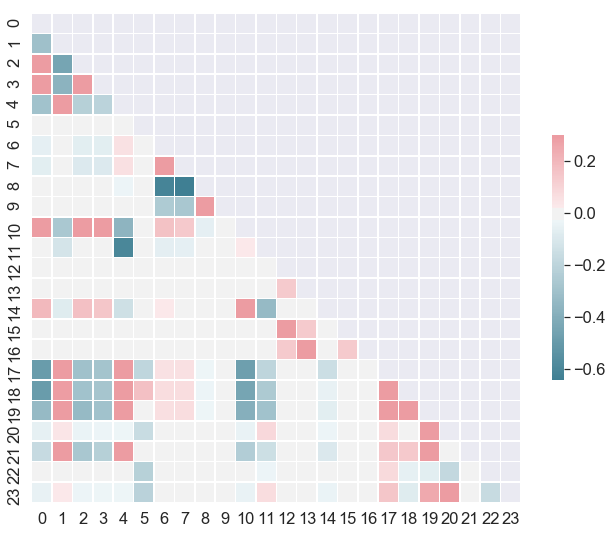

In [357]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.savefig('img_corr'+ '.jpg', format = 'jpg', bbox_inches = 'tight')

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                   shuffle = True)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [53]:
scaler = StandardScaler()

In [54]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

[0.05291138 0.08797459 0.10676261 0.11884356 0.0486011  0.02763738
 0.0220119  0.02038233 0.01973977 0.01859341 0.06651735 0.02552194
 0.01884803 0.02285844 0.02713991 0.01959368 0.02184386 0.03113672
 0.03243189 0.06028939 0.05016957 0.04188479 0.02391305 0.03439335]


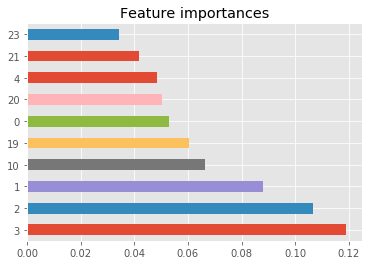

In [113]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, train_test_split,StratifiedKFold
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=10, max_depth=50,min_samples_split=2, random_state=42)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# param = {'n_estimators': [10,20,30,40,50,60],
#         'max_depth': [int(x) for x in np.linspace(10, 50, num = 10)]}
# model = GridSearchCV(model, param,cv=cv, return_train_score=True)
model.fit(X_train_scaler,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature importances')
#plt.ylabel('Features')
plt.savefig('feature imp'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()

In [114]:
from sklearn.metrics import recall_score, accuracy_score,f1_score,precision_score
print('TRAIN recall:', recall_score(y_train, model.predict(X_train_scaler))  )
print('TEST recall:', recall_score(y_test, model.predict(X_test_scaler))  )
print('TRAIN accuracy_score:', accuracy_score(y_train, model.predict(X_train_scaler))  )
print('TEST accuracy_score:', accuracy_score(y_test, model.predict(X_test_scaler))  )
print('TRAIN f1_score:',f1_score(y_train, model.predict(X_train_scaler))  )
print('TEST f1_score:', f1_score(y_test, model.predict(X_test_scaler))  )
print('TRAIN precision_score:',precision_score(y_train, model.predict(X_train_scaler))  )
print('TEST precision_score:', precision_score(y_test, model.predict(X_test_scaler))  )

TRAIN recall: 1.0
TEST recall: 0.8386004514672686
TRAIN accuracy_score: 1.0
TEST accuracy_score: 0.8431114040870138
TRAIN f1_score: 1.0
TEST f1_score: 0.8619489559164732
TRAIN precision_score: 1.0
TEST precision_score: 0.8866348448687351


[0.10651518 0.03650654 0.1424118  0.19402486 0.07762514 0.008365
 0.01592527 0.01169748 0.03177679 0.         0.08588191 0.0162131
 0.00660659 0.01093066 0.00813454 0.         0.         0.01273771
 0.01428154 0.09467698 0.0512585  0.04132431 0.00465799 0.02844813]


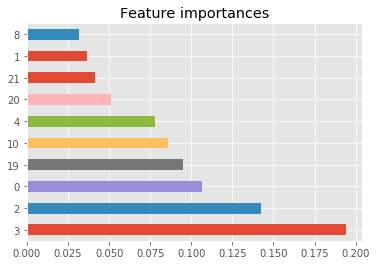

In [119]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
from xgboost import plot_importance
# fit model no training data
model = XGBClassifier()
model.fit(X_train_scaler, y_train)
# feature importance
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
# plot
# plot feature importance
plt.title('Feature importances')
#plt.ylabel('Features')
plt.savefig('feature imp_XGB'+ '.jpg', format = 'jpg', bbox_inches = 'tight')
plt.show()

In [84]:
model.get_booster().get_score(importance_type="gain")

{'f2': 88.4375165713726,
 'f0': 66.14577270884614,
 'f10': 53.332542602073154,
 'f3': 120.48915116842106,
 'f21': 25.662331941554058,
 'f14': 5.051538628333333,
 'f1': 22.670511245082356,
 'f20': 31.831453151343744,
 'f4': 48.20509685896551,
 'f18': 8.86881640996,
 'f7': 7.264117962166666,
 'f19': 58.79426521838709,
 'f11': 10.06831333481111,
 'f17': 7.910096375391304,
 'f5': 5.194652885384615,
 'f23': 17.666249143333335,
 'f12': 4.1026812421428565,
 'f6': 9.8895681981875,
 'f8': 19.733338149999998,
 'f22': 2.89260411345,
 'f13': 6.787926593333334}

In [81]:
model.feature_importances_

array([0.10651518, 0.03650654, 0.1424118 , 0.19402486, 0.07762514,
       0.008365  , 0.01592527, 0.01169748, 0.03177679, 0.        ,
       0.08588191, 0.0162131 , 0.00660659, 0.01093066, 0.00813454,
       0.        , 0.        , 0.01273771, 0.01428154, 0.09467698,
       0.0512585 , 0.04132431, 0.00465799, 0.02844813], dtype=float32)

In [184]:
from sklearn.pipeline import Pipeline

In [185]:
pipe = []
pipe.append(('scaler', scaler))
pipe.append(('lr', LogisticRegression()))
model = Pipeline(pipe)

In [186]:
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [188]:
from sklearn.metrics import recall_score
recall_score(y_test, model.predict(X_test), average='macro') 

0.7841605463397882

In [189]:
from sklearn.metrics import accuracy_score,f1_score,precision_score

In [190]:
print('TRAIN recall:', recall_score(y_train, model.predict(X_train))  )
print('TEST recall:', recall_score(y_test, model.predict(X_test))  )
print('TRAIN accuracy_score:', accuracy_score(y_train, model.predict(X_train))  )
print('TEST accuracy_score:', accuracy_score(y_test, model.predict(X_test))  )
print('TRAIN f1_score:',f1_score(y_train, model.predict(X_train))  )
print('TEST f1_score:', f1_score(y_test, model.predict(X_test))  )
print('TRAIN precision_score:',precision_score(y_train, model.predict(X_train))  )
print('TEST precision_score:', precision_score(y_test, model.predict(X_test))  )

TRAIN recall: 0.826580226904376
TEST recall: 0.8250564334085779
TRAIN accuracy_score: 0.795911638641609
TEST accuracy_score: 0.7910349373764007
TRAIN f1_score: 0.8317477575428105
TEST f1_score: 0.8218100056211356
TRAIN precision_score: 0.8369803063457331
TEST precision_score: 0.8185890257558791


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [97]:
model = RandomForestClassifier()
model.fit(X_train_scaler, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
importances = model.feature_importances_

In [101]:
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

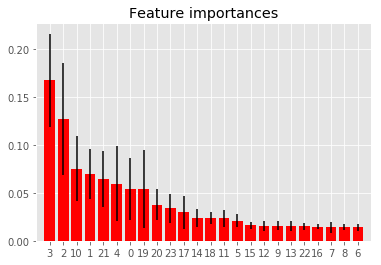

In [103]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [98]:
print('TRAIN recall:', recall_score(y_train, model.predict(X_train))  )
print('TEST recall:', recall_score(y_test, model.predict(X_test))  )
print('TRAIN accuracy_score:', accuracy_score(y_train, model.predict(X_train))  )
print('TEST accuracy_score:', accuracy_score(y_test, model.predict(X_test))  )
print('TRAIN f1_score:',f1_score(y_train, model.predict(X_train))  )
print('TEST f1_score:', f1_score(y_test, model.predict(X_test))  )
print('TRAIN precision_score:',precision_score(y_train, model.predict(X_train))  )
print('TEST precision_score:', precision_score(y_test, model.predict(X_test))  )

TRAIN recall: 0.9986493787142086
TEST recall: 0.9988713318284425
TRAIN accuracy_score: 0.6094625783053083
TEST accuracy_score: 0.5833882663150955
TRAIN f1_score: 0.7573491754583632
TEST f1_score: 0.7368859283930058
TRAIN precision_score: 0.6099653522521036
TEST precision_score: 0.5837730870712401


In [236]:
models = {
    'lr':  Pipeline([('scaler',StandardScaler()), ('lr', LogisticRegression(solver='saga', l1_ratio=1))]),
    'rf': Pipeline([('scaler',StandardScaler()), ('rf', RandomForestClassifier())]),
    'gb': Pipeline([('scaler',StandardScaler()), ('gb', GradientBoostingClassifier())]),
    'xgb': Pipeline([('scaler',StandardScaler()), ('xgb', XGBClassifier())])#,
    #'svc': Pipeline([('scaler',StandardScaler()), ('svc', SVC())]),
    #'knn': Pipeline([('scaler',StandardScaler()), ('knn', KNeighborsRegressor())]),
    #'lsvc': Pipeline([('scaler',StandardScaler()), ('lsvc', LinearSVC())]), 
    #'gnb': Pipeline([('scaler',StandardScaler()), ('gnb', GaussianNB())])    
}

In [237]:
parameters = {
    'lr': {'lr__penalty': ['l1', 'l2', 'elasticnet'],
        'lr__C':  [0.001, 0.01, 0.1, 1.0, 10.0, 100.]},
    
    'rf': {#'rf__n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
          'rf__max_depth': [int(x) for x in np.linspace(10, 50, num = 10)],
          'rf__min_samples_split': np.arange(2,10)},
    
    'gb': {'gb__learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
          'gb__n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
          #'gb__max_depths': np.linspace(1, 32, 32, endpoint=True),
          'gb__min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)},
    
    'xgb': {'xgb__max_depth':range(3,10,2),
             'xgb__min_child_weight':range(1,6,2)}#,
    
#     'svc': {'svc__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.],
#            'svc__kernel': [ 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
#            },
    
    #'knn': {'knn__n_neighbors': np.arange(5,30)}
    
#     'lsvc': {'lsvc__penalty': ['l1', 'l2'],
#             'lsvc__loss': ['hinge', 'squared_hinge'],
#             'lsvc__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.]},
    
#     'gnb': {'gnb__var_smoothing': [1e-10, 1e-9, 1e-8,1e-7]}
}
    
    

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn.metrics import average_precision_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
for model in models.keys():
    print('model:', model)
    simplefilter(action='ignore')
    clf = GridSearchCV(models[model], parameters[model],cv=3, return_train_score=True)
    clf.fit(X_train, y_train)
    
    #clf = clf.best_model_
    
    print('____________________________________')
    try:
        print('TRAIN recall:', recall_score(y_train, clf.predict(X_train))  )
        print('TEST recall:', recall_score(y_test, clf.predict(X_test))  )
    except ValueError:
        continue
    print('____________________________________')
    try:
        print('TRAIN accuracy_score:', accuracy_score(y_train, clf.predict(X_train))  )
        print('TEST accuracy_score:', accuracy_score(y_test, clf.predict(X_test))  )
    except ValueError:
        continue
    print('____________________________________')
    try:
        print('TRAIN f1_score:',f1_score(y_train, clf.predict(X_train))  )
        print('TEST f1_score:', f1_score(y_test, clf.predict(X_test))  )
    except ValueError:
        continue
    print('____________________________________')
    try:
        print('TRAIN precision_score:',precision_score(y_train, clf.predict(X_train))  )
        print('TEST precision_score:', precision_score(y_test, clf.predict(X_test))  )
    except ValueError:
        continue
    print('____________________________________')
    print('____________________________________')
    print('____________________________________')

model: lr
____________________________________
TRAIN recall: 0.8292814694759589
TEST recall: 0.8261851015801355
____________________________________
TRAIN accuracy_score: 0.787833827893175
TEST accuracy_score: 0.7791694133157547
____________________________________
TRAIN f1_score: 0.8267133432072169
TEST f1_score: 0.8137854363535297
____________________________________
TRAIN precision_score: 0.8241610738255034
TEST precision_score: 0.8017524644030668
____________________________________
____________________________________
____________________________________
model: rf
____________________________________
TRAIN recall: 0.9762290653700703
TEST recall: 0.881489841986456
____________________________________
TRAIN accuracy_score: 0.9713155291790306
TEST accuracy_score: 0.8582729070533949
____________________________________
TRAIN f1_score: 0.9764928397730344
TEST f1_score: 0.8790095666854248
____________________________________
TRAIN precision_score: 0.9767567567567568
TEST precision_score

In [196]:
from sklearn.neighbors import KNeighborsRegressor

In [200]:
from sklearn.metrics import r2_score

In [205]:
neigh = KNeighborsRegressor(n_neighbors=3)
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
neigh.fit(X_train_scaler, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [206]:
r2_score(y_train, neigh.predict(X_train_scaler)), r2_score(y_test, neigh.predict(X_test_scaler))

(0.6411865447953774, 0.3318872707138133)

In [255]:
from sklearn.svm import SVM

ImportError: cannot import name 'SVM'

In [225]:
clf = SVC(gamma='auto')

In [226]:
clf.fit(X_train_scaler, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [227]:
print('TRAIN recall:', recall_score(y_train, clf.predict(X_train_scaler))  )
print('TEST recall:', recall_score(y_test, clf.predict(X_test_scaler))  )

TRAIN recall: 0.8679092382495948
TEST recall: 0.8555304740406321


In [242]:
SVC().get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [244]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
parameter = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.]
           }

model = SVC(gamma='auto')
r = GridSearchCV(model, parameter, cv=3)
r.fit(X_train_scaler, y_train) 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [251]:
r.best_estimator_

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(0.5, 1.0, 'dependensy')

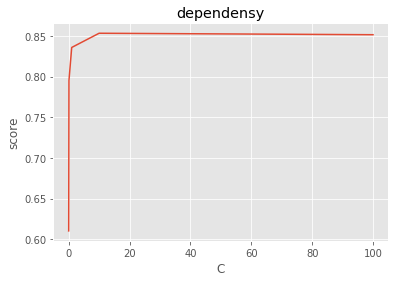

In [250]:
plt.plot(parameter['C'], r.cv_results_['mean_test_score' ])
plt.xlabel('C')
plt.ylabel('score')
plt.title('dependensy')

In [245]:
print('TRAIN recall:', recall_score(y_train, r.predict(X_train_scaler))  )
print('TEST recall:', recall_score(y_test, r.predict(X_test_scaler))  )

TRAIN recall: 0.9024851431658563
TEST recall: 0.8702031602708804


In [252]:
print('TRAIN recall:', recall_score(y_train, r.predict(X_train_scaler))  )
print('TEST recall:', recall_score(y_test, r.predict(X_test_scaler))  )
print('TRAIN accuracy_score:', accuracy_score(y_train, r.predict(X_train))  )
print('TEST accuracy_score:', accuracy_score(y_test, r.predict(X_test))  )
print('TRAIN f1_score:',f1_score(y_train, r.predict(X_train))  )
print('TEST f1_score:', f1_score(y_test, r.predict(X_test))  )
print('TRAIN precision_score:',precision_score(y_train, r.predict(X_train))  )
print('TEST precision_score:', precision_score(y_test, r.predict(X_test))  )

TRAIN recall: 0.9024851431658563
TEST recall: 0.8702031602708804
TRAIN accuracy_score: 0.6102868447082097
TEST accuracy_score: 0.5840474620962426
TRAIN f1_score: 0.757985257985258
TEST f1_score: 0.737411568872243
TRAIN precision_score: 0.6102868447082097
TEST precision_score: 0.5840474620962426
